<AxesSubplot:>

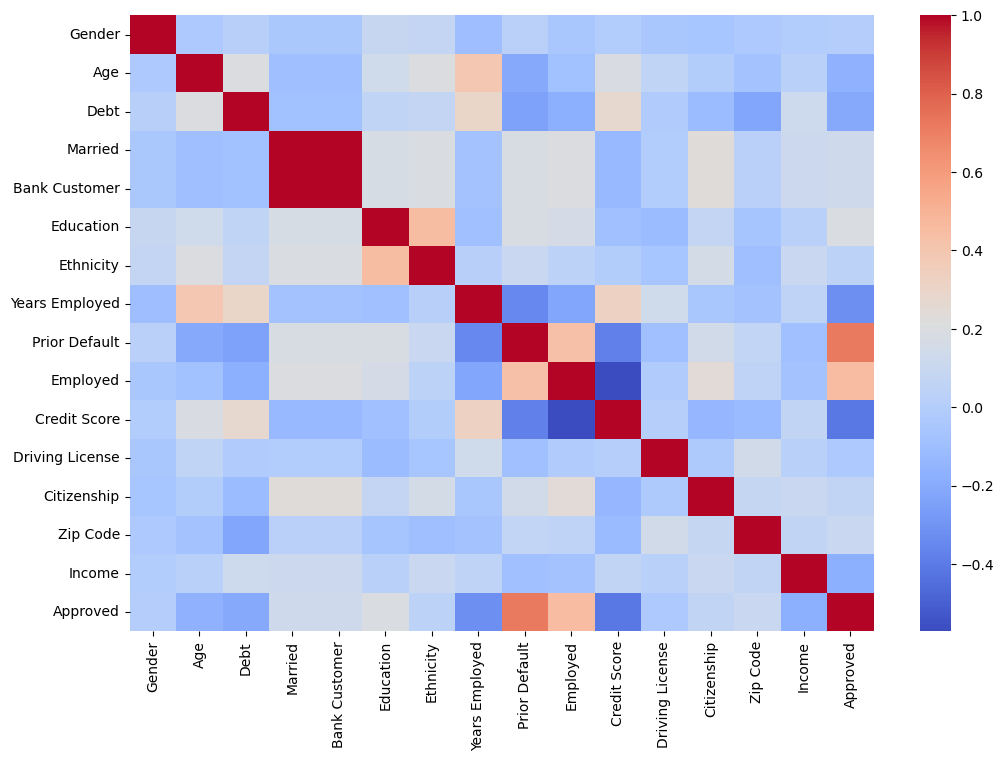

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


def filterDf(df, colNames):
    for cols in colNames:
        d = {}
        for i in df[cols]:
            if i not in d:
                d[i] = len(d)
        df[cols] = df[cols].map(d)

def handleMissingNumeric(df, colNames):
    for col in colNames:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].fillna(df[col].mean())

def fillUnknown(df, colNames):
    for col in colNames:
        temp = df[col].value_counts().to_dict()    
        if '?' in temp:
            temp['?'] = max(temp)

        for i in temp:
            if i!='?':
                temp[i] = i
        df[col] = df[col].map(temp)


headerRow = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income', 'Approved']
df = pd.read_csv('crx.data', names = headerRow)

#To replace ? using pd
#df = df.replace('?', np.nan)
#df.fillna(method = 'ffill', inplace = True)

#To replace ? using mine
#fillUnknown(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship'])
handleMissingNumeric(df, ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income'])

#sns.distplot(df['Age'])
#filterDf(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

dim = (12, 8)
fig, ax = plt.subplots(figsize = dim)


#sns.countplot(data = df, x = 'Citizenship')
features = ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income']


#scaler = StandardScaler()
#df[features] = scaler.fit_transform(df[features])

#p = features[5]
#sns.distplot(df[p])

#sns.set()
#cols = ['Age', 'Income', 'Credit Score', 'Debt', 'Years Employed']
#sns.pairplot(df[cols], size = 2.5)
#plt.show();

filterDf(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

cMatrix = df.corr()
sns.heatmap(cMatrix, annot = False, cmap = 'coolwarm')

In [4]:
#fig, ax= plt.subplots()

#ax.scatter(df['Debt'], df['Age'])
#ax.set_xlabel('Debt')
#ax.set_ylabel('Age')


#df.columns = range(df.shape[1])
#predFeatures = range(df.shape[1] - 1)
#targetFeature = [df.shape[1] - 1]



def splitWoRandom(df, k):
    k = int(df.shape[0]*k)
    return (df[:k], df[k:])


#trainDf, testDf = train_test_split(df, test_size=0.3)
trainDf, testDf = splitWoRandom(df, 0.7)

x = ['Gender', 'Age', 'Debt','Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income']
y = ['Approved']


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#trainAcc = []
#testAcc = []
from sklearn import metrics
trainAcc=[]
testAcc=[]
list1=[]
for i in range(1, 16):
    
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)

    dtc.fit(trainDf[x], trainDf[y])

    trainPred = dtc.predict(trainDf[x])
    trainAcc.append(score(trainPred, trainDf[y])*100)
    
    #print(round(score(trainPred, trainDf[y]), 4))

    testPred = dtc.predict(testDf[x])
    testAcc.append(score(testPred, testDf[y])*100)
    
    list1.append([i,metrics.accuracy_score(trainPred, trainDf[y]),metrics.accuracy_score(testPred, testDf[y])])
    

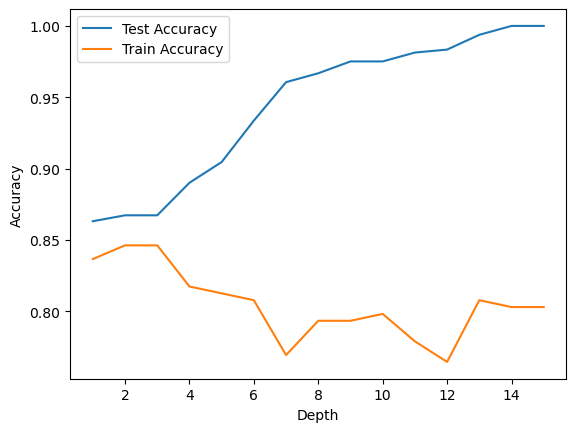

In [5]:
from pandas import DataFrame
df2 = DataFrame (list1,columns=['Depth','Test Accuracy','Train Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

In [6]:
trainDf

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
0,0,30.83,0.000,0,0,0,0,1.250,0,0,1,0,0,202.0,0,0
1,1,58.67,4.460,0,0,1,1,3.040,0,0,6,0,0,43.0,560,0
2,1,24.50,0.500,0,0,1,1,1.500,0,1,0,0,0,280.0,824,0
3,0,27.83,1.540,0,0,0,0,3.750,0,0,5,1,0,100.0,3,0
4,0,20.17,5.625,0,0,0,0,1.710,0,1,0,0,1,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0,39.17,2.500,1,1,9,1,10.000,1,1,0,1,1,200.0,0,1
478,0,22.75,11.500,0,0,9,0,0.415,1,1,0,0,0,0.0,0,1
479,2,26.50,2.710,1,1,14,6,0.085,1,1,0,0,1,80.0,0,1
480,1,16.92,0.500,0,0,9,0,0.165,1,0,6,1,0,240.0,35,1


In [7]:
import numpy as np

# Inspect missing values in the dataset


# Replace the '?'s with NaN
df = df.replace('?',np.nan)
df.tail(17)

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
673,2,29.50,2.000,1,1,10,1,2.000,1,1,0,0,0,256.0,17,1
674,1,37.33,2.500,0,0,9,1,0.210,1,1,0,0,0,260.0,246,1
675,1,41.58,1.040,0,0,11,0,0.665,1,1,0,0,0,240.0,237,1
676,1,30.58,10.665,0,0,1,1,0.085,1,0,12,1,0,129.0,3,1
677,0,19.42,7.250,0,0,2,0,0.040,1,0,1,0,0,100.0,1,1
678,1,17.92,10.210,0,0,12,3,0.000,1,1,0,0,0,0.0,50,1
679,1,20.08,1.250,0,0,6,0,0.000,1,1,0,0,0,0.0,0,1
680,0,19.50,0.290,0,0,5,0,0.290,1,1,0,0,0,280.0,364,1
681,0,27.83,1.000,1,1,7,1,3.000,1,1,0,0,0,176.0,537,1
682,0,17.08,3.290,0,0,9,0,0.335,1,1,0,1,0,140.0,2,1


In [8]:
df.isnull().sum()

Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education          0
Ethnicity          0
Years Employed     0
Prior Default      0
Employed           0
Credit Score       0
Driving License    0
Citizenship        0
Zip Code           0
Income             0
Approved           0
dtype: int64

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(df[x], df[y],test_size=0.30,random_state=2)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

trainAcc = []
testAcc = []

for i in range(1, 2):
    
    dtc = LogisticRegression(random_state = 0)

    dtc.fit(xTrain, yTrain)
    
    trainPred = dtc.predict(xTrain)
    trainAcc.append(score(trainPred, yTrain)*100)
    
    #print(round(score(trainPred, trainDf[y]), 4))

    testPred = dtc.predict(xTest)
    testAcc.append(score(testPred, yTest)*100)
    
    print('{}, {}, {}'.format(i, round(score(trainPred, yTrain), 4), round(score(testPred, yTest), 4)))

1, 0.8199, 0.8261


In [11]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

trainPred = clf.predict(xTrain)
testPred = clf.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.979296, Test : 0.898551


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

tol = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
max_iter = [50, 100, 150, 200, 250, 300]
param_grid = dict(tol=tol, max_iter=max_iter)

grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)


scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(xTrain)
rescaledX_test = scaler.fit_transform(xTest)

rescaledX = scaler.fit_transform(xTrain)

grid_model_result = grid_model.fit(xTrain, yTrain)

best_score, best_params = (grid_model_result.best_score_, grid_model_result.best_params_)

print("Best: %f using %s" % (best_score, grid_model_result.best_params_))

Best: 0.846843 using {'max_iter': 300, 'tol': 0.0001}


In [13]:
dtc = LogisticRegression(tol = 0.0001, max_iter = 300)
dtc.fit(xTrain, yTrain)

trainPred = dtc.predict(xTrain)

testPred = dtc.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.853002, Test : 0.869565


In [14]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

trainPred = clf.predict(xTrain)
testPred = clf.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.979296, Test : 0.898551


In [15]:

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(xTrain, yTrain)

trainPred = mlp.predict(xTrain)
testPred = mlp.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.792961, Test : 0.797101


In [16]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator = LogisticRegression(tol = 0.0001, max_iter = 300),random_state=0)
clf.fit(xTrain, yTrain)

clf.predict(xTrain)

trainPred = clf.predict(xTrain)
testPred = clf.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.859213, Test : 0.898551
